# Data van Sentinel Hub valideren met Amazon Rainforest dataset

We willen onze data van Sentinel hub gaan vergelijken met de Amazon RainForest Dataset. We halen de coordinaten uit de tiff bestanden van de dataset. Vervolgens sturen we een request aan Sentinel Hub om true color satellietbeeld en mask van die coordinaten. Als laatst vergelijken we met de satellietbeelden en mask uit de dataset.


In [1]:
from python_scripts.connector import *
from python_scripts.helper import *

from eval_scripts.evalscript_true_color import *
from eval_scripts.evalscript_ndvi import *
from eval_scripts.evalscript_ndvi_values import *

from sentinelhub.geo_utils import *
from sentinelhub.constants import CRS
from sentinelhub.geometry import BBox
import math 
import matplotlib.pyplot as plt
from PIL import Image



Succefully connected!


In [2]:
no_clouds = { 
    "dataFilter": { 
        "maxCloudCoverage": 0
    } 
}

In [3]:
coords_Amazon_Rainforest =[[-61.64304123722222, -7.1977762330555555, -61.59664948444445, -7.151749156666667],
[-47.276085125277774, -5.1459865675000005, -47.229872031388894, -5.099955920555555],
[-72.68058219944444, -7.546572816111111, -72.63415454916667, -7.500546328333333],
[-54.907312499999996, -16.483174878333333, -54.8593125, -16.437143912222222],
[-56.41083402305556, -15.082882561666667, -56.36315190388889, -15.036849999444444],
[-56.45938240527778, -13.673990039444444, -56.411989040277774, -13.62795547],
[-55.1953125, -12.487397424166666, -55.14817974277778, -12.441361218611112],
[-58.31184397277777, -14.310413613611113, -58.26431294555555, -14.2643830875],
[-57.82104207194445, -9.679239864444444, -57.774349465, -9.633204256944445],
[-57.51602668138889, -9.841712924444446, -57.46928557527778, -9.795677582777778],
[-51.494502314722226, -6.24193727, -51.44820601861111, -6.19590667],
[-51.1439817775, 0.029311676666666668, -51.09794597194445, 0.07534719333333334],
[-44.55610613305555, -4.537154218055555, -44.50994044944444, -4.491124064166667],
[-51.14374599861111, -2.903435306388889, -51.097651248333335, -2.857403249722222],
[-52.64127957722222, -8.591274486666666, -52.59473186583334, -8.545247906111111],
[-54.09449481027778, -3.8356628486111113, -54.04836462083333, -3.7896283052777777],
[-46.360107985, -4.140418458611111, -46.31396597027778, -4.094391151388889],
[-56.46292321888889, -5.1920172141666665, -56.416710125277774, -5.1459865675000005],
[-56.15536277611111, -13.516114908611112, -56.10804416416667, -13.470086673611112],
[-54.556744950833334, -15.669065434444445, -54.50891077611111, -15.623036831666667],
[-64.1517942775, -0.44362786111111113, -64.10575847194444, -0.39759407750000003],
[-68.6720579625, -10.717961193611112, -68.62521955499999, -10.67193133111111],
[-47.88742315583333, -3.3925968516666667, -47.841316598333336, -3.3465685875],
[-53.909914925555555, -4.186445765555556, -53.86377291083333, -4.140418458611111],
[-59.71893239305556, -9.633204256944445, -59.672239786111106, -9.587168649444445],
[-60.46875, -11.454581911666667, -60.42180164305555, -11.408551905277777],
[-47.414771816388885, -4.4450939102777784, -47.36860613305556, -4.399063756666667],
[-52.94571418138889, -10.025854291388889, -52.89897307527778, -9.979818949722222],
[-48.071207199444444, -7.592599303611111, -48.02477954916667, -7.546572816111111],
[-49.99615893777778, -5.1459865675000005, -49.94994584416666, -5.099955920555555]]

# Amazon_1279.tiff_29.tiff
# Amazon_124.tiff_36.tiff
# Amazon_1712.tiff_26.tiff
# Amazon_727.tiff_30.tiff
# Amazon_822.tiff_20.tiff
# Amazon_819.tiff_11.tiff
# Amazon_720.tiff_40.tiff
# Amazon_970.tiff_1.tiff
# Amazon_954.tiff_36.tiff
# Amazon_898.tiff_3.tiff
# Amazon_425.tiff_44.tiff
# Amazon_404.tiff_52.tiff
# Amazon_5.tiff_50.tiff
# Amazon_390.tiff_12.tiff
# Amazon_505.tiff_26.tiff
# Amazon_639.tiff_49.tiff
# Amazon_58.tiff_41.tiff
# Amazon_832.tiff_43.tiff
# Amazon_801.tiff_42.tiff
# Amazon_692.tiff_6.tiff
# Amazon_1377.tiff_12.tiff
# Amazon_1561.tiff_37.tiff
# Amazon_170.tiff_38.tiff
# Amazon_640.tiff_53.tiff
# Amazon_1110.tiff_25.tiff
# Amazon_1154.tiff_40.tiff
# Amazon_122.tiff_33.tiff
# Amazon_511.tiff_35.tiff
# Amazon_181.tiff_34.tiff
# Amazon_323.tiff_38.tiff

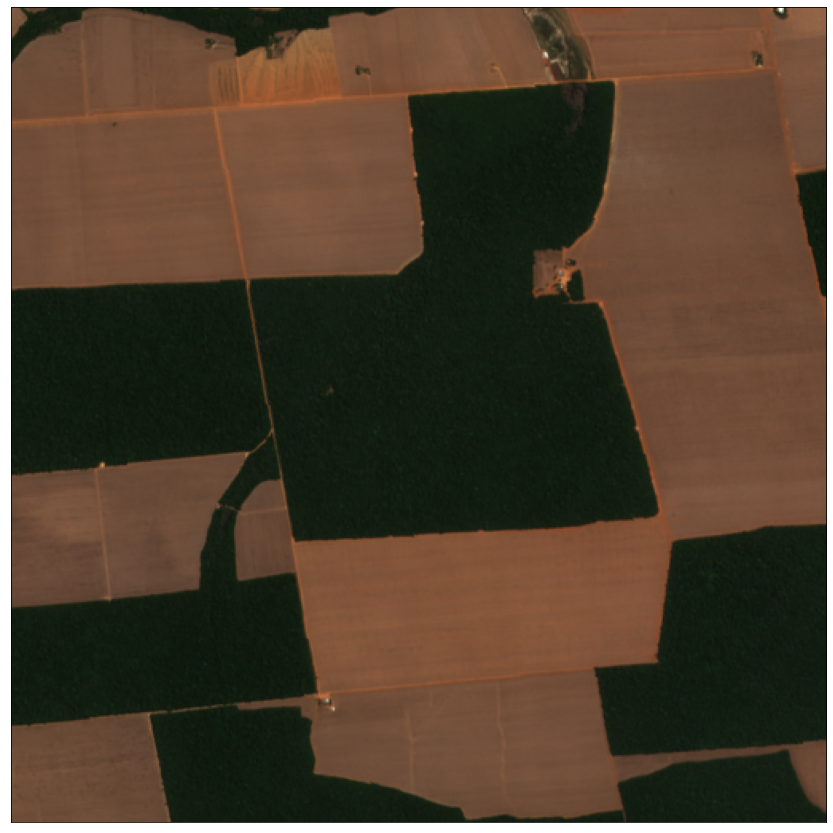

In [4]:
img_true = simple_request(evalscript_true_color, [-55.1953125, -12.487397424166666, -55.14817974277778, -12.441361218611112], config, False, other_args=no_clouds)
plot_image(img_true)

In [5]:
def generate_mask(coords):
    img_ndvi = simple_request(evalscript_ndvi_values, coords, config, False, other_args=no_clouds)
    min_ndvi = 0.75
    ndvi_copy = img_ndvi.copy()
    labels = np.where(ndvi_copy > min_ndvi, 255, 0)
    img = Image.fromarray(labels)
    img.show()

In [6]:
generate_mask([-55.1953125, -12.487397424166666, -55.14817974277778, -12.441361218611112])

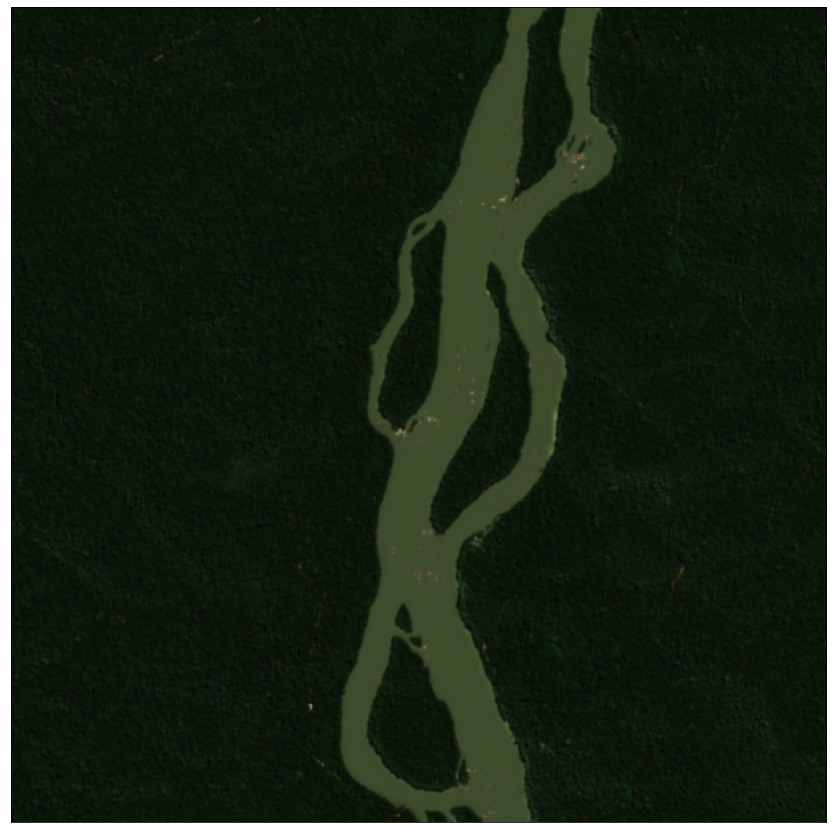

In [9]:
img_true = simple_request(evalscript_true_color, coords_Amazon_Rainforest[17], config, False, other_args=no_clouds)
plot_image(img_true)

In [7]:
generate_mask(coords_Amazon_Rainforest[17])